In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Unión de Dataframes

In [2]:
# Load the DataFrame from the HDF5 file
Train_Air = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train/Train_set_1A.h5', key='df')
Train_Mob = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Mobilidad/Train/Mobilidad_1A.h5 ', key='df')

In [3]:
Train_Air = Train_Air.reset_index()

Train_Air.columns

Index(['Fecha_Hora', 'pm_25', 'comuna'], dtype='object')

In [4]:
# Cambiar el nombre de la columna
Train_Air.rename(columns={'comuna': 'codigo comuna',
                   'Fecha_Hora':'Fecha Trafico'}, inplace=True)

In [5]:
Train_Air.columns

Index(['Fecha Trafico', 'pm_25', 'codigo comuna'], dtype='object')

In [6]:
Train_Mob.reset_index()

,Fecha Trafico,Hora,dia-num,mes-num,año,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,Ocupación,Longitud,Latitud,codigo comuna,operacion_encoded
0,2021-01-01 00:00:00,0.0,5.0,1.0,2021.0,33.0,18.0,18.0,0.0,0.0,0.0,833398.250,1181104.375,16.0,1.0
1,2021-01-01 01:00:00,1.0,5.0,1.0,2021.0,38.0,24.0,23.0,1.0,0.0,0.0,833398.250,1181104.375,16.0,1.0
2,2021-01-01 02:00:00,2.0,5.0,1.0,2021.0,32.0,16.0,16.0,0.0,0.0,0.0,833398.250,1181104.375,16.0,1.0
3,2021-01-01 03:00:00,3.0,5.0,1.0,2021.0,35.0,15.0,15.0,0.0,0.0,0.0,833398.250,1181104.375,16.0,1.0
4,2021-01-01 04:00:00,4.0,5.0,1.0,2021.0,34.0,15.0,15.0,0.0,0.0,0.0,833398.250,1181104.375,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011927,2022-09-30 19:00:00,19.0,5.0,9.0,2022.0,24.0,103.0,59.0,0.0,0.0,2.0,834089.643,1179095.693,14.0,1.0
6011928,2022-09-30 20:00:00,20.0,5.0,9.0,2022.0,21.0,77.0,54.0,1.0,0.0,1.0,834089.643,1179095.693,14.0,1.0
6011929,2022-09-30 21:00:00,21.0,5.0,9.0,2022.0,19.0,88.0,64.0,0.0,0.0,2.0,834089.643,1179095.693,14.0,1.0
6011930,2022-09-30 22:00:00,22.0,5.0,9.0,2022.0,17.0,41.0,28.0,0.0,0.0,0.0,834089.643,1179095.693,14.0,1.0


In [7]:
# Realizar un inner join entre los dos DataFrames
df_joined = pd.merge(Train_Mob, Train_Air, on=['Fecha Trafico', 'codigo comuna'], how='left')


In [8]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851329 entries, 0 to 8851328
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Fecha Trafico        datetime64[ns]
 1   Hora                 float64       
 2   dia-num              float64       
 3   mes-num              float64       
 4   año                  float64       
 5   Velocidad (Km/h)     float64       
 6   Intensidad           float64       
 7   Nº vehiculos long 1  float64       
 8   Nº vehiculos long 2  float64       
 9   Nº vehiculos long 3  float64       
 10  Ocupación            float64       
 11  Longitud             float64       
 12  Latitud              float64       
 13  codigo comuna        float64       
 14  operacion_encoded    float64       
 15  pm_25                float64       
dtypes: datetime64[ns](1), float64(15)
memory usage: 1.1 GB


In [9]:
def missing_values(df):
    Column_Names = df.columns

    Total_rows = df.shape[0]

    missing_values = df.isnull().sum()

    Percent_missing = (missing_values / Total_rows)*100
    
    result = pd.DataFrame({
        'Column_Name': Column_Names,
        'Missing_Values': missing_values.values,
        'Total_Rows': Total_rows,
        'Percent_Missing': Percent_missing.values
    })

    return result

In [10]:
missing_values(df_joined)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Fecha Trafico,0,8851329,0.0
1,Hora,0,8851329,0.0
2,dia-num,0,8851329,0.0
3,mes-num,0,8851329,0.0
4,año,0,8851329,0.0
5,Velocidad (Km/h),0,8851329,0.0
6,Intensidad,0,8851329,0.0
7,Nº vehiculos long 1,0,8851329,0.0
8,Nº vehiculos long 2,0,8851329,0.0
9,Nº vehiculos long 3,0,8851329,0.0


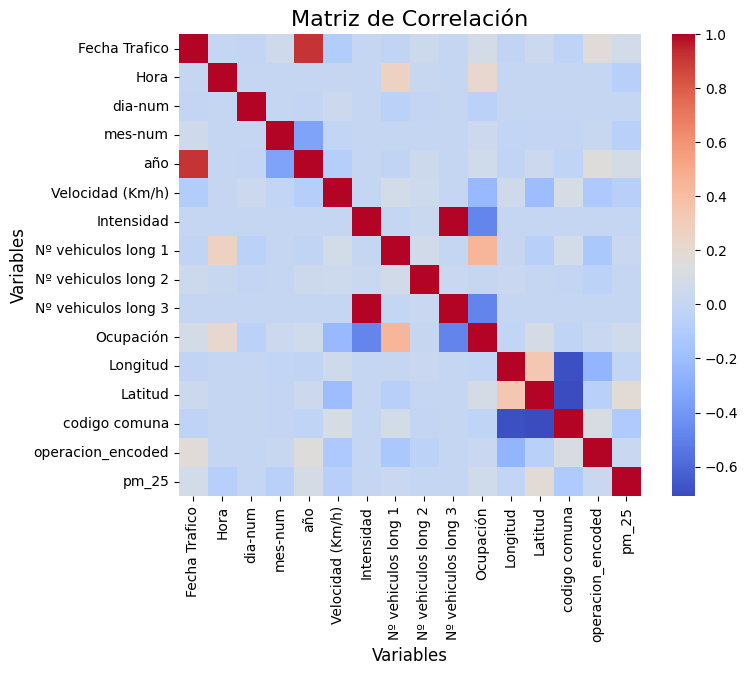

In [18]:
# Calcular la matriz de correlación
correlation_matrix = df_joined.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Títulos y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Mostrar la visualización
plt.show()